### <span style="color:blue">This is a dataset about various job listings on Monster.com (USA). It is an extremely dirty dataset containing useless rows, wrong data type, lot of missing values, wrong column entries ets. Lets gets our hands dirty and see how we can clean this data.</span>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\soura\OneDrive\Documents\Datasets\monster_com-job_sample.csv\monster_com-job_sample.csv")

In [3]:
df

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,United States of America,US,NaN,No,jobs.monster.com,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640
21996,United States of America,US,NaN,No,jobs.monster.com,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de
21997,United States of America,US,NaN,No,jobs.monster.com,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345
21998,United States of America,US,NaN,No,jobs.monster.com,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b


#### We can see there are various useless rows in this dataframe like country,country_code,has_expired (because they have only single values). Also columns like page_url, uniq_id,job_board are not required for our analysis.

In [4]:
df=df.drop(['country', 'country_code','job_board','page_url'],axis=1)

In [5]:
df=df[[ 'uniq_id','date_added', 'has_expired', 'job_description', 'job_title', 'job_type',
       'location', 'organization', 'salary', 'sector']].copy()

In [6]:
df.drop(['date_added','has_expired'],axis=1,inplace=True)

In [7]:
df.describe()

,uniq_id,job_description,job_title,job_type,location,organization,salary,sector
count,22000,22000,22000,20372,22000,15133,3446,16806
unique,22000,18744,18759,39,8423,738,1737,163
top,5f579a37db98f6d7db0fbc5313633b79,12N Horizontal Construction Engineers Job Desc...,Monster,Full Time,"Dallas, TX",Healthcare Services,"40,000.00 - 100,000.00 $ /year",Experienced (Non-Manager)
freq,1,104,318,6757,646,1919,50,4594


#### Lets first clean the job_type column. It has few values but written wrongly in many styles. Lets club them together.

In [8]:
df['job_type'].value_counts()

Full Time                                        6757
Full Time Employee                               6617
Full Time, Employee                              3360
Full Time Temporary/Contract/Project             1062
Full Time, Temporary/Contract/Project             533
Full Time , Employee                              406
Part Time Employee                                382
Part Time                                         329
Part Time, Employee                               196
Temporary/Contract/Project                        193
Employee                                          147
Full Time / Employee                              121
Full Time , Temporary/Contract/Project             56
Part Time, Temporary/Contract/Project              34
Per Diem, Employee                                 29
Per Diem                                           22
Job Type Full Time Employee                        19
Part Time Seasonal                                 17
Part Time/ Temporary/Contrac

In [9]:
df['job_type']=df['job_type'].str.strip()
df['organization']=df['organization'].str.strip()
df['location']=df['location'].str.strip()

In [10]:
df['job_type']=df['job_type'].replace(['Full Time Employee','Full Time, Employee','Full Time , Employee',
                                       'Full Time / Employee','Job Type Full Time Employee','Full Time/ Employee',
                                      'Full Time  Employee','Full Time / > Employee','Full Time  Employee','Full Time  Full Time'],'Full Time')

In [11]:
df['job_type']=df['job_type'].str.replace("Employee","Full Time")
df['job_type']=df['job_type'].str.replace("Per Diem","Part Time")

In [12]:
df['job_type']=df['job_type'].replace(['Part Time Full Time','Part Time, Full Time','Per Diem, Full Time',
                                      'Per Diem Full Time','Part Time , Full Time','Part Time / Full Time',
                                      'Job Type Part Time Full Time'],'Part Time/Full Time')

In [13]:
df['job_type']=df['job_type'].str.replace(",","/")

In [14]:
d=df['job_type'].str.split("/",expand=True)

In [15]:
d=d.replace(np.nan,"")
d[0]=d[0].str.strip()
d[1]=d[1].str.strip()
d[2]=d[2].str.strip()
d[3]=d[3].str.strip()
d["new"]=(d[0]+"/"+d[1]+"/"+d[2]+"/"+d[3]).str.strip("/")
df['job_type']=d["new"]

In [16]:
df['job_type']=df['job_type'].replace("",np.nan)
df['job_type']=df['job_type'].replace(['Full Time Temporary/Contract/Project','Job Type Full Time Temporary/Contract/Project'],'Full Time/Temporary/Contract/Project')

In [17]:
df['job_type']=df['job_type'].replace('Part Time Temporary/Contract/Project','Part Time/Temporary/Contract/Project')
df['job_type']=df['job_type'].replace('Part Time Seasonal','Part Time')
df['job_type']=df['job_type'].replace('Part Time Intern','Part Time/Intern')
df['job_type']=df['job_type'].replace('Full Time Intern','Full Time/Intern')
df['job_type']=df['job_type'].replace(['Job Type Full Time','Full Time\xa0 Full Time'],'Full Time')

In [18]:
df['job_type'].value_counts()

Full Time                               17459
Full Time/Temporary/Contract/Project     1654
Part Time/Full Time                       627
Part Time                                 369
Temporary/Contract/Project                193
Part Time/Temporary/Contract/Project       61
Full Time/Intern                            5
Part Time/Intern                            3
Exempt                                      1
Name: job_type, dtype: int64

####  The location column is messed up. Many of its rows accidentally contain job description. Also some of the organization column contains location values. We need to clean them out too. For cleaning this I used an external datasource containing all cities and states of USA and compared our data with it so as to extract correct locations.

In [19]:
usa=pd.read_excel(r"C:\Users\soura\OneDrive\Documents\Files\USA Cities full list.xlsx")
usa

,City,Abbreviation,State
0,holtsville,NY,new york
1,adjuntas,PR,puerto rico
2,aguada,PR,puerto rico
3,aguadilla,PR,puerto rico
4,maricao,PR,puerto rico
...,...,...,...
29854,klawock,AK,alaska
29855,metlakatla,AK,alaska
29856,point baker,AK,alaska
29857,ward cove,AK,alaska


In [20]:
usa.columns

Index(['City', 'Abbreviation', 'State '], dtype='object')

In [21]:
cities=list(usa["City"])
states=list(usa['State '])
abb=list(usa["Abbreviation"])

In [22]:
usa2=usa[['State ',"Abbreviation"]].drop_duplicates(subset=['State ',"Abbreviation"])

In [23]:
df.loc[df["location"].str.len()>30,"location"]=np.nan

In [24]:
df["location"]=df["location"].str.strip("0123456789, /")

In [25]:
def city(y):
    x=y.split(",")   
    if len(x)!=0:
        s=x[0].strip(" ").lower()
        if s in cities:
            return(s)
        else:
            return(np.nan)
    else:
        return (np.nan)
    

df.loc[df["location"].notnull(),"city"]=df.loc[df["location"].notnull(),"location"].apply(lambda x:city(x))

In [26]:
def state(y):
    x=y.split(",")  
    if len(x)==0:
        return(s)
    
    elif len(x)==1:
        s=x[0].strip(" ").lower()
        if s in states:
            return(s)
        elif s.upper() in abb:
            return(usa2.loc[usa2["Abbreviation"]==s.upper(),'State '].tolist()[0])
        else:
            return(np.nan)
    else:
        s=x[1].strip(" ").lower()
        if s in states:
            return(s)
        if s.upper() in abb:
            return(usa2.loc[usa2["Abbreviation"]==s.upper(),'State '].tolist()[0])

df.loc[df["location"].notnull(),"state"]=df.loc[df["location"].notnull(),"location"].apply(lambda x:state(x))

In [27]:
df["organization"]=df["organization"].str.strip("0123456789, /")
df.loc[(df["organization"].str.len()<=30)&(df["city"].isnull())&(df["state"].isnull()),"state_rep"]=df.loc[(df["organization"].str.len()<=30)&(df["city"].isnull())&(df["state"].isnull()),"organization"].apply(lambda x:state(x))
df.loc[(df["organization"].str.len()<=30)&(df["city"].isnull())&(df["state"].isnull()),"city_rep"]=df.loc[(df["organization"].str.len()<=30)&(df["city"].isnull())&(df["state"].isnull()),"organization"].apply(lambda x:city(x))

In [28]:
df["state"]=np.where(df["state"].isnull(),df["state_rep"],df["state"])
df["city"]=np.where(df["city"].isnull(),df["city_rep"],df["city"])

In [29]:
df.loc[(df["state_rep"].notnull())|(df["city_rep"].notnull()),"organization"]=np.nan

In [30]:
df.drop(["state_rep","city_rep","location"],axis=1,inplace=True)

In [31]:
df[df["state"].notnull()]

,uniq_id,job_description,job_title,job_type,organization,salary,sector,city,state
0,11d599f229a80023d2f40e7c52cd941e,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time,NaN,NaN,IT/Software Development,madison,wisconsin
1,e4cbb126dabf22159aff90223243ff2a,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,Printing and Publishing,NaN,NaN,madison,wisconsin
3,58435fcab804439efdcaa7ecca0fd783,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,Altec Industries,NaN,Experienced (Non-Manager),dixon,california
4,64d0272dc8496abfd9523a8df63c184c,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time,Retail,NaN,Project/Program Management,NaN,pennsylvania
5,1e2637cb5f7a2c4615a99a26c0566c66,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time,Computer/IT Services,NaN,Experienced (Non-Manager),charlottesville,virginia
...,...,...,...,...,...,...,...,...,...
21995,a80bc8cc3a90c17eef418963803bc640,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,cincinnati,ohio
21996,419a3714be2b30a10f628de207d041de,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),cincinnati,ohio
21997,5a590350b73b2cec46b05750a208e345,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,NaN,NaN,NaN,chicago,illinois
21998,40161cf61c283af9dc2b0a62947a5f1b,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time,"Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,chicago,illinois


#### Also the salary column contains some yearly values and some hourly values. So we created some extra fields containing max/min yearly and hourly salary for further analysis.

In [32]:
def min_yr_sal(x):
    if pd.isnull(x):
        return (np.nan)
    elif "/year" in str(x):
        a=str(x).split("/year")[0].replace("$","").strip()
        b=a.replace(",","").strip("+").strip()
        min_sal=b.split("-")[0].strip()
        return (min_sal)
    else:
        return(np.nan)
    

def max_yr_sal(x):
    if pd.isnull(x):
        return (np.nan)
    elif "/year" in str(x):
        a=str(x).split("/year")[0].replace("$","").strip()
        b=a.replace(",","").strip("+").strip()
        if "-" in b:
            max_sal=b.split("-")[1].strip()
            return (max_sal)
        else:
            return (np.nan)
    else:
        return(np.nan)
        

df["min_yearly_salary"]=df["salary"].apply(lambda x:min_yr_sal(x))        
df["max_yearly_salary"]=df["salary"].apply(lambda x:max_yr_sal(x))

In [33]:
def min_hr_sal(x):
    if pd.isnull(x):
        return (np.nan)
    elif "/hour" in str(x):
        a=str(x).split("/hour")[0].replace("$","").strip()
        b=a.replace(",","").strip("+").strip()
        min_sal=b.split("-")[0].strip()
        return (min_sal)
    else:
        return(np.nan)
    

def max_hr_sal(x):
    if pd.isnull(x):
        return (np.nan)
    elif "/hour" in str(x):
        a=str(x).split("/hour")[0].replace("$","").strip()
        b=a.replace(",","").strip("+").strip()
        if "-" in b:
            max_sal=b.split("-")[1].strip()
            return (max_sal)
        else:
            return (np.nan)
    else:
        return(np.nan)
        

df["min_hourly_salary"]=df["salary"].apply(lambda x:min_hr_sal(x))        
df["max_hourly_salary"]=df["salary"].apply(lambda x:max_hr_sal(x))

In [34]:
df.drop("salary",axis=1,inplace=True)

#### The sector column also contains some wrong entries. We assume that it should not contain anything having length more than 50.

In [48]:
df.loc[df["sector"].str.len()>50,"sector"]=np.nan

In [49]:
df=df[['uniq_id', 'job_title', 'job_description', 'organization','sector',
        'city', 'state','job_type', 'min_yearly_salary', 'max_yearly_salary',
       'min_hourly_salary', 'max_hourly_salary']]

In [50]:
df

,uniq_id,job_title,job_description,organization,sector,city,state,job_type,min_yearly_salary,max_yearly_salary,min_hourly_salary,max_hourly_salary
0,11d599f229a80023d2f40e7c52cd941e,IT Support Technician Job in Madison,TeamSoft is seeing an IT Support Specialist to...,NaN,IT/Software Development,madison,wisconsin,Full Time,NaN,NaN,NaN,NaN
1,e4cbb126dabf22159aff90223243ff2a,Business Reporter/Editor Job in Madison,The Wisconsin State Journal is seeking a flexi...,Printing and Publishing,NaN,madison,wisconsin,Full Time,NaN,NaN,NaN,NaN
2,839106b353877fa3d896ffb9c1fe01c0,Johnson & Johnson Family of Companies Job Appl...,Report this job About the Job DePuy Synthes Co...,Personal and Household Services,NaN,NaN,NaN,Full Time,NaN,NaN,NaN,NaN
3,58435fcab804439efdcaa7ecca0fd783,Engineer - Quality Job in Dixon,Why Join Altec? If you’re considering a career...,Altec Industries,Experienced (Non-Manager),dixon,california,Full Time,NaN,NaN,NaN,NaN
4,64d0272dc8496abfd9523a8df63c184c,Shift Supervisor - Part-Time Job in Camphill,Position ID# 76162 # Positions 1 State CT C...,Retail,Project/Program Management,NaN,pennsylvania,Full Time,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21995,a80bc8cc3a90c17eef418963803bc640,Assistant Vice President - Controller Job in C...,This is a major premier Cincinnati based finan...,NaN,NaN,cincinnati,ohio,Full Time,120000.0,160000.00,NaN,NaN
21996,419a3714be2b30a10f628de207d041de,Accountant Job in Cincinnati,Luxury homebuilder in Cincinnati seeking multi...,Construction - Residential & Commercial/Office,Manager (Manager/Supervisor of Staff),cincinnati,ohio,Full Time,45000.0,60000.00,NaN,NaN
21997,5a590350b73b2cec46b05750a208e345,AEM/CQ developer Job in Chicago,RE: Adobe AEM- Client - Loca...,NaN,NaN,chicago,illinois,Full Time,NaN,NaN,NaN,NaN
21998,40161cf61c283af9dc2b0a62947a5f1b,Electrician - Experienced Forging Electrician ...,Jernberg Industries was established in 1937 an...,"Jernberg Industries, Inc.",Installation/Maintenance/Repair,chicago,illinois,Full Time,NaN,NaN,25.00,28.00


## Analyzing:


In [39]:
df["job_type"].value_counts()

Full Time                               17459
Full Time/Temporary/Contract/Project     1654
Part Time/Full Time                       627
Part Time                                 369
Temporary/Contract/Project                193
Part Time/Temporary/Contract/Project       61
Full Time/Intern                            5
Part Time/Intern                            3
Exempt                                      1
Name: job_type, dtype: int64

<AxesSubplot:>

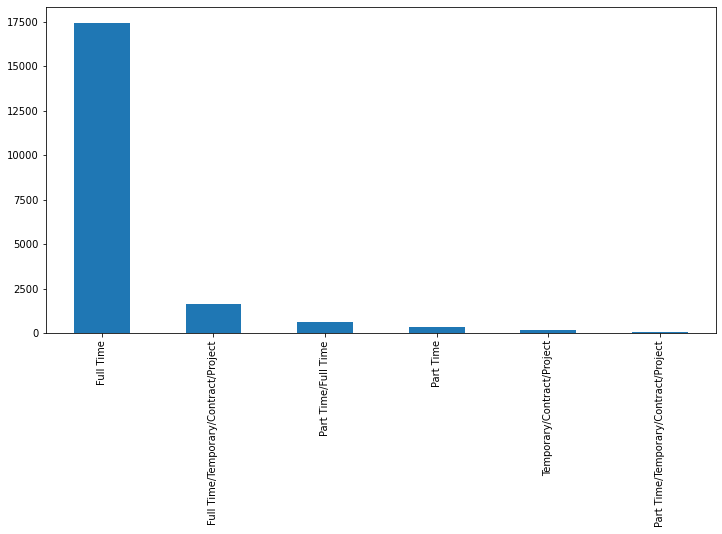

In [40]:
df["job_type"].value_counts().head(6).plot(kind="bar",figsize=(12,6))

In [41]:
df["organization"].value_counts().head(10)     # Top 10 organizations giving max jobs 

Healthcare Services                  1919
All                                  1158
Retail                               1081
Other/Not Classified                 1048
Manufacturing - Other                 885
Computer/IT Services                  822
Legal Services                        466
Business Services - Other             410
Restaurant/Food Services              384
Transport and Storage - Materials     342
Name: organization, dtype: int64

In [42]:
df["sector"].value_counts().head(10)          # Top 10 sectors giving max jobs 

Experienced (Non-Manager)                4594
Medical/Health                           1254
Entry Level                              1172
Sales/Retail/Business Development         938
Manager (Manager/Supervisor of Staff)     900
IT/Software Development                   861
Project/Program Management                790
Accounting/Finance/Insurance              742
Food Services/Hospitality                 633
Installation/Maintenance/Repair           574
Name: sector, dtype: int64

<AxesSubplot:>

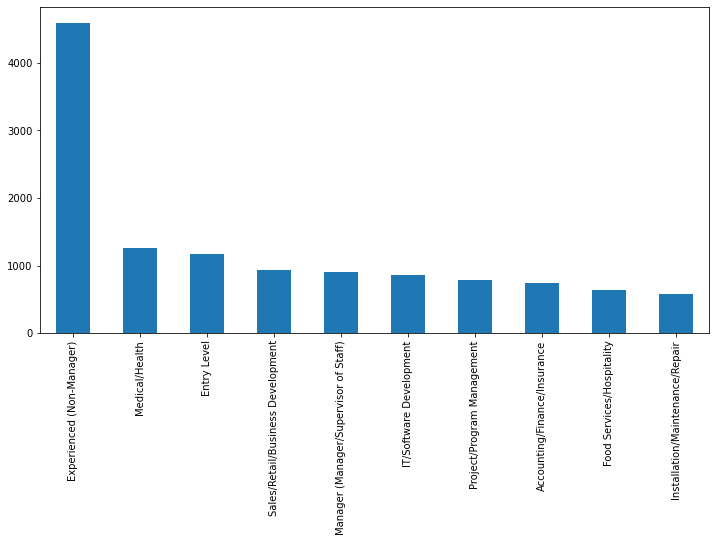

In [43]:
df["sector"].value_counts().head(10).plot(kind="bar",figsize=(12,6))

In [44]:
df.loc[df["state"].notnull(),"state"].value_counts().head(10)       # Top 10 cities with max jobs

texas            3120
ohio             2304
california       1660
pennsylvania      959
illinois          885
florida           825
georgia           741
massachusetts     665
new york          647
tennessee         599
Name: state, dtype: int64

<AxesSubplot:>

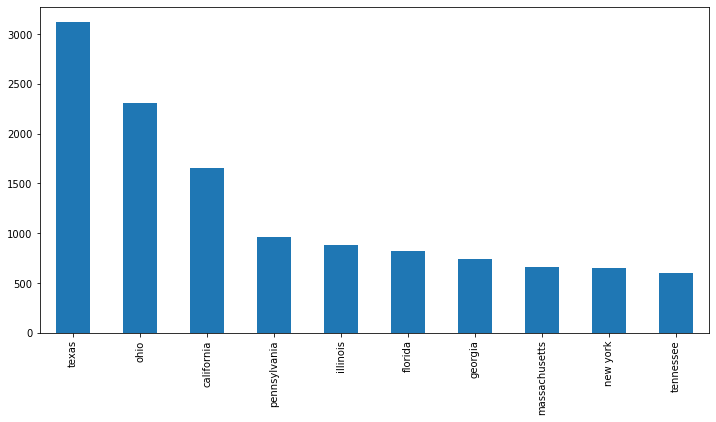

In [45]:
df.loc[df["state"].notnull(),"state"].value_counts().head(10).plot(kind="bar",figsize=(12,6))

In [46]:
df["min_yearly_salary"]=df["min_yearly_salary"].astype(float)
s=df[df['state'].notnull()].pivot_table(index="state",values="min_yearly_salary",aggfunc=[np.mean,'count']).sort_values(('count','min_yearly_salary'),ascending=False)

In [47]:
# Cities with highest avg(min_yearly_salary)
s[s[("count","min_yearly_salary")]>=15].sort_values(("mean","min_yearly_salary"),ascending=False)    

,mean,count
,min_yearly_salary,min_yearly_salary
new york,89865.451613,62
massachusetts,81326.244186,129
california,66779.326923,104
illinois,65395.958333,96
michigan,65062.035714,28
alabama,65000.000000,16
"washington, d.c.",63386.666667,15
kentucky,62125.000000,16
texas,61182.421743,327
